In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet('D:/bev_resale_database_without_outlier.parquet')

<Axes: xlabel='SALE_PRICE', ylabel='Density'>

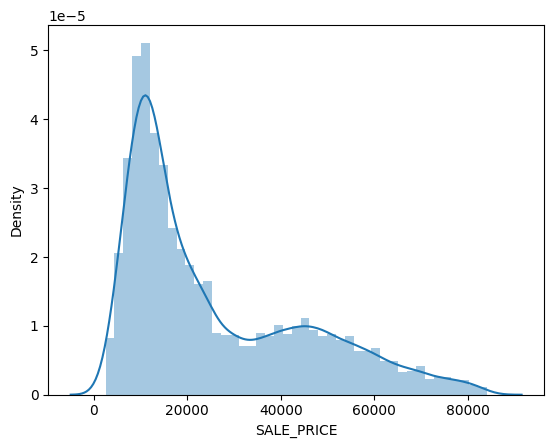

In [3]:
sns.distplot( df['SALE_PRICE'] )

<Axes: xlabel='MODEL_YEAR', ylabel='SALE_PRICE'>

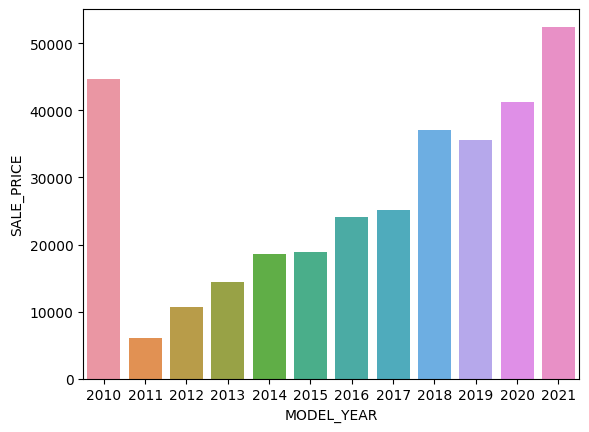

In [4]:
# média de preço dos carros com o passar dos anos
aux1 = df[['MODEL_YEAR', 'SALE_PRICE']].groupby( 'MODEL_YEAR' ).mean().reset_index()
sns.barplot( x='MODEL_YEAR', y='SALE_PRICE', data=aux1 )

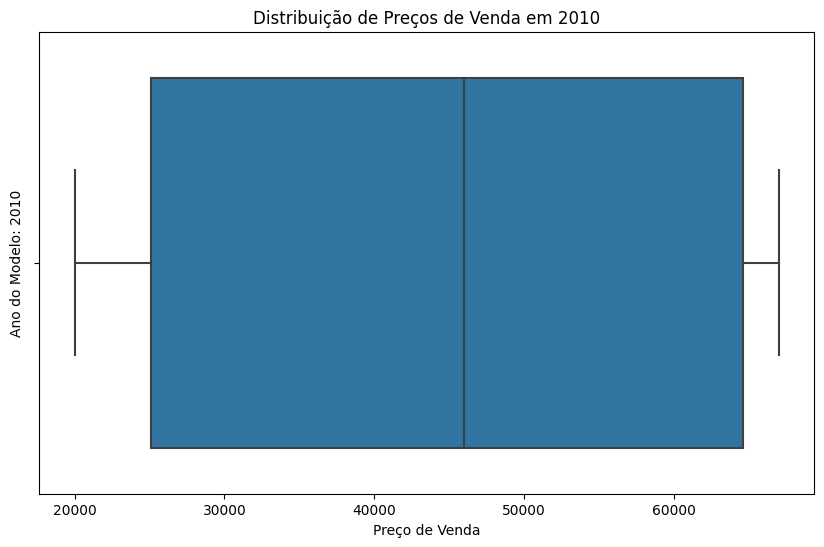

In [6]:
# Filtrando o DataFrame para conter apenas os dados de 2010
df_2010 = df[df['MODEL_YEAR'] == 2010]

# Criando um boxplot para os preços de venda em 2010
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
sns.boxplot(x='SALE_PRICE', data=df_2010)
plt.title('Distribuição de Preços de Venda em 2010')
plt.xlabel('Preço de Venda')
plt.ylabel('Ano do Modelo: 2010')
plt.show()

<Axes: xlabel='MODEL_YEAR', ylabel='NO_CARROS'>

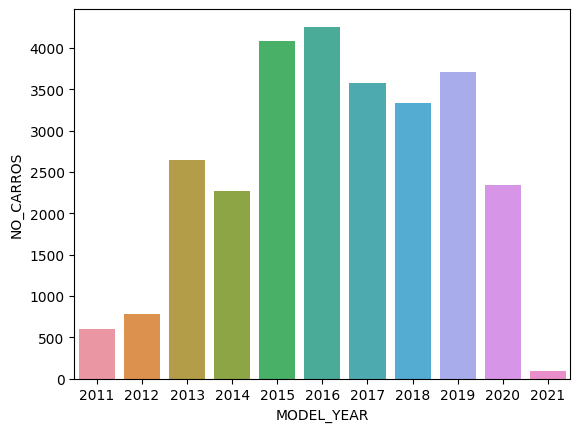

In [16]:
aux1 = df.groupby('MODEL_YEAR',as_index=False).agg(NO_CARROS = ('SALE_PRICE','count'))

# contagem de produção de carros com o passar do tempo
aux1 = aux1[aux1["MODEL_YEAR"] != 2010 ]
sns.barplot( x='MODEL_YEAR', y='NO_CARROS', data=aux1 )

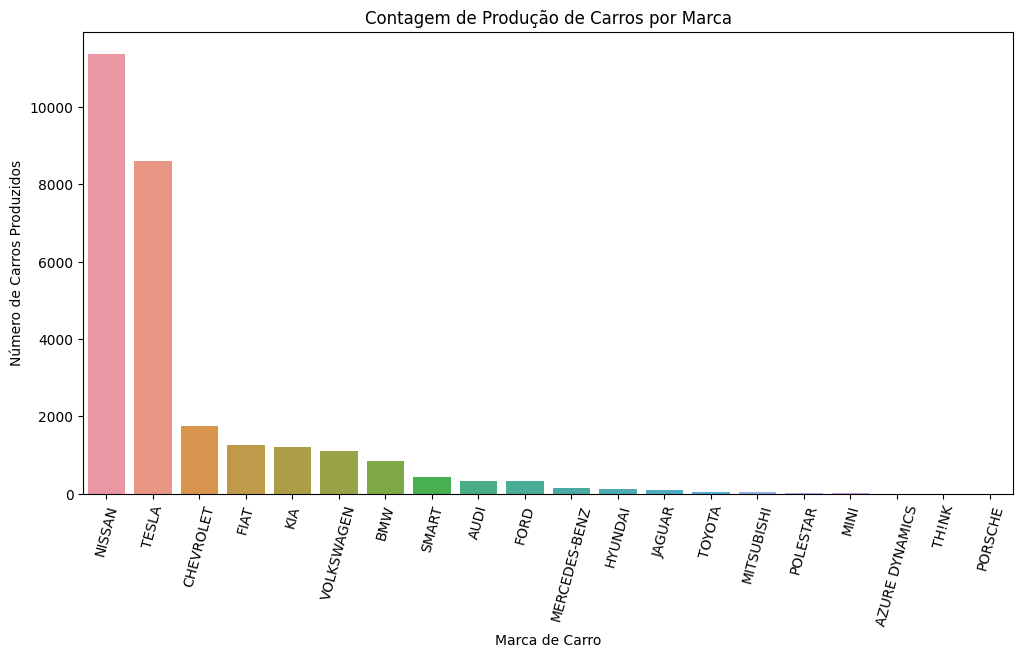

In [22]:
carros_por_marca = df.groupby('MAKE',as_index=False).agg(NO_CARROS = ('SALE_PRICE','count'))
# Ordene as barras por contagem decrescente
carros_por_marca = carros_por_marca.sort_values(by='NO_CARROS', ascending=False)

# Crie um gráfico de barras para mostrar a contagem de carros por marca
plt.figure(figsize=(12, 6)) 
sns.barplot(x='MAKE', y='NO_CARROS', data=carros_por_marca)
plt.title('Contagem de Produção de Carros por Marca')
plt.xlabel('Marca de Carro')
plt.ylabel('Número de Carros Produzidos')
plt.xticks(rotation=75) 
plt.show()

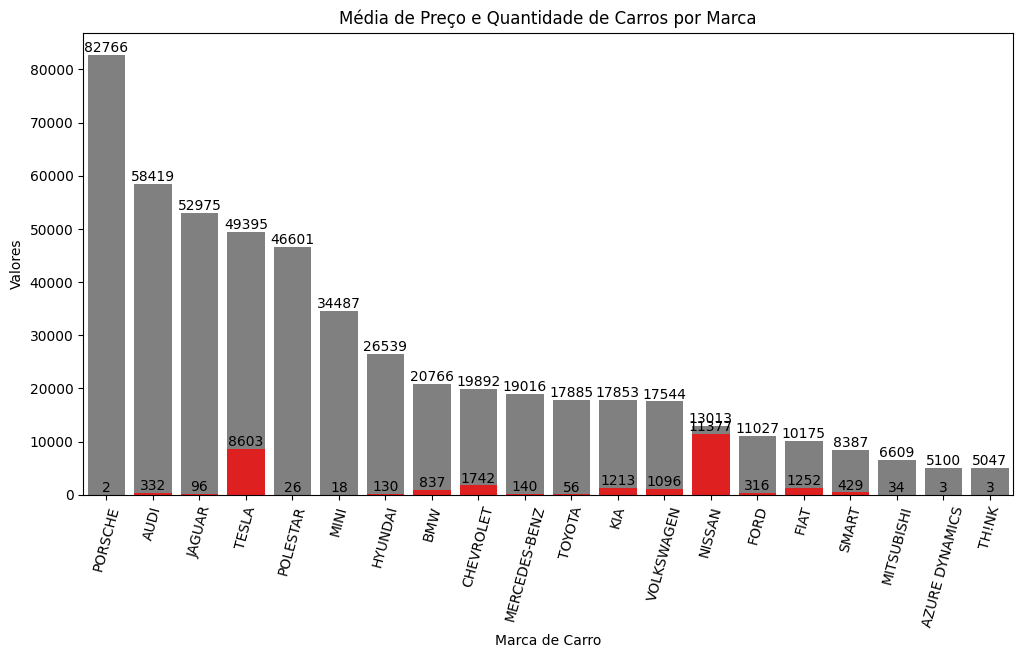

In [27]:
media_preco_por_marca = df[['MAKE', 'SALE_PRICE']].groupby('MAKE').mean().reset_index()


quantidade_carros_por_marca = df[['MAKE', 'SALE_PRICE']].groupby('MAKE').count().reset_index()
quantidade_carros_por_marca = quantidade_carros_por_marca.rename(columns={'SALE_PRICE': 'QUANTIDADE'})


dados_combinados = pd.merge(media_preco_por_marca, quantidade_carros_por_marca, on='MAKE')


dados_combinados = dados_combinados.sort_values(by='SALE_PRICE', ascending=False)


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='MAKE', y='SALE_PRICE', data=dados_combinados, color='grey', label='Média de Preço')
ax = sns.barplot(x='MAKE', y='QUANTIDADE', data=dados_combinados, color='red', label='Quantidade de Carros')
plt.title('Média de Preço e Quantidade de Carros por Marca')
plt.xlabel('Marca de Carro')
plt.ylabel('Valores')
plt.xticks(rotation=75)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

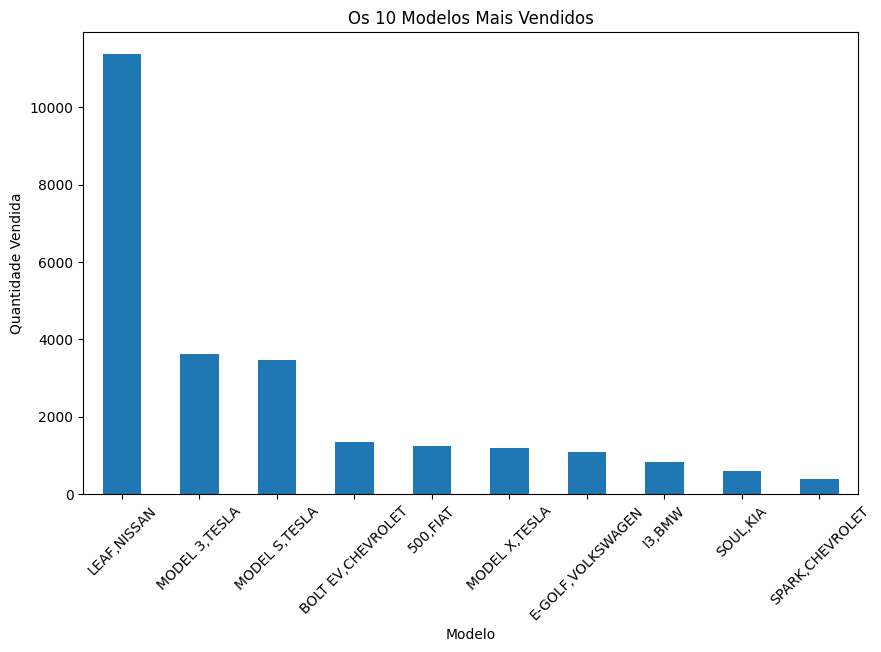

In [31]:
df['MODEL_MAKE'] = df[['MODEL','MAKE']].apply(lambda x: ','.join(x),axis=1)
top_10_models2 = df['MODEL_MAKE'].value_counts().head(10)


plt.figure(figsize=(10, 6))
top_10_models2.plot(kind='bar')
plt.title('Os 10 Modelos Mais Vendidos')
plt.xlabel('Modelo')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

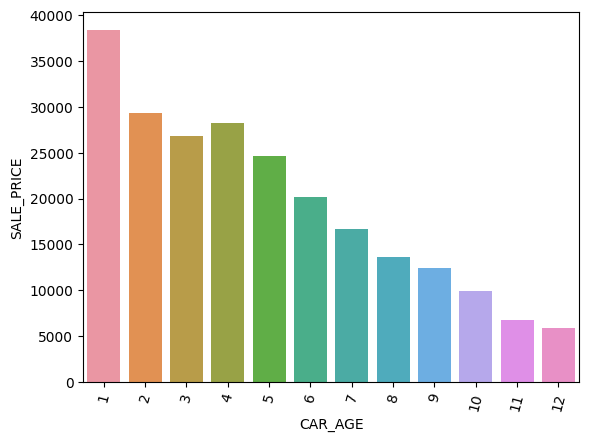

In [25]:
# média de preço de carro por ano de carro
aux4 = df[['CAR_AGE', 'SALE_PRICE']].groupby( 'CAR_AGE' ).mean().reset_index()
sns.barplot( x='CAR_AGE', y='SALE_PRICE', data=aux4 )
plt.xticks(rotation=75);

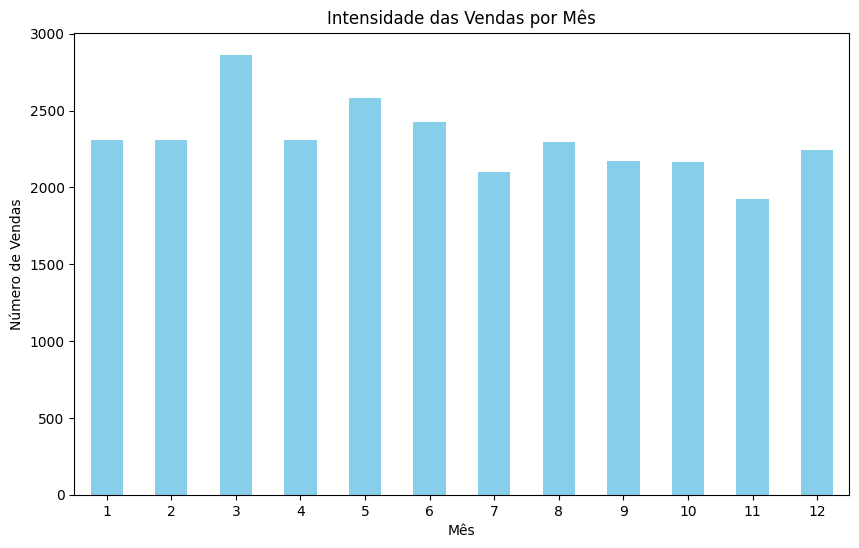

In [35]:
# Extrair o mês da coluna 'SALE_DATE'
df['SALE_MONTH'] = df['SALE_DATE'].dt.month

# Contar o número de vendas em cada mês
vendas_por_mes = df['SALE_MONTH'].value_counts().sort_index()

# Criar um gráfico de barras para mostrar a intensidade das vendas por mês
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Intensidade das Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.show()

In [37]:
# Agrupe os dados por cidade e estado, conte o número de vendas e ordene em ordem decrescente
rotatividade_por_localidade = df.groupby(['CITY', 'STATE_OF_RESIDENCE']).size().reset_index(name='VENDAS')
rotatividade_por_localidade = rotatividade_por_localidade.sort_values(by='VENDAS', ascending=False)

# Pegue as cinco maiores localidades
cinco_maiores_localidades = rotatividade_por_localidade.head(5)

print("Cinco Maiores Localidades por Rotatividade de Vendas:")
print(cinco_maiores_localidades)

Cinco Maiores Localidades por Rotatividade de Vendas:
          CITY STATE_OF_RESIDENCE  VENDAS
319    SEATTLE                 WA    5147
376  VANCOUVER                 WA    1126
22    BELLEVUE                 WA    1098
354     TACOMA                 WA     855
30     BOTHELL                 WA     737


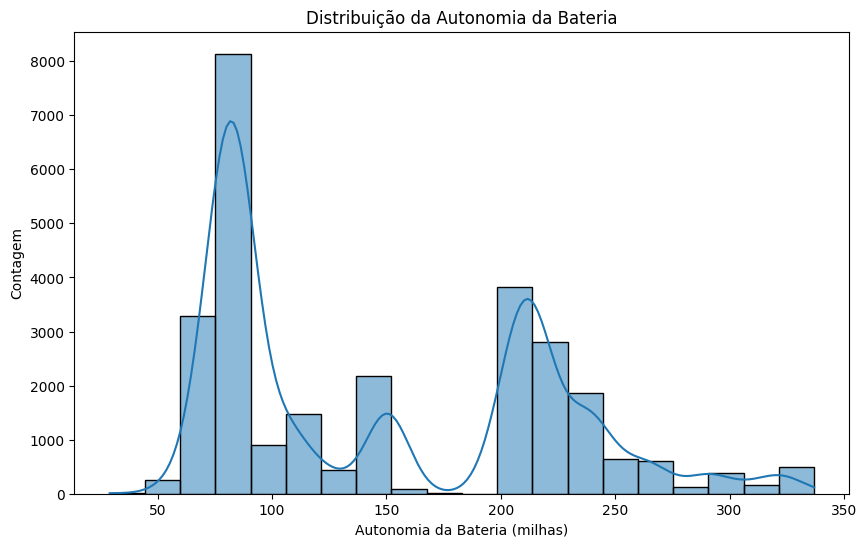

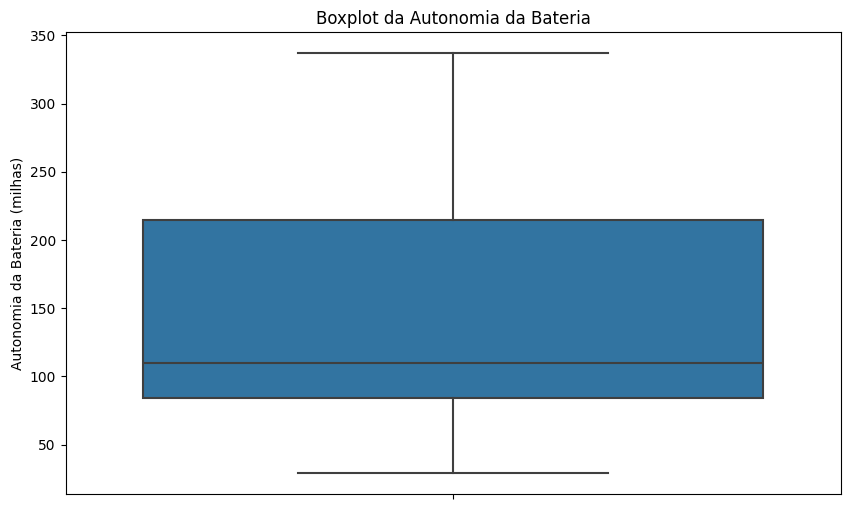

In [38]:
# Histograma da Autonomia da Bateria
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ELECTRIC_RANGE', bins=20, kde=True)
plt.title('Distribuição da Autonomia da Bateria')
plt.xlabel('Autonomia da Bateria (milhas)')
plt.ylabel('Contagem')
plt.show()

# Boxplot da Autonomia da Bateria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='ELECTRIC_RANGE')
plt.title('Boxplot da Autonomia da Bateria')
plt.ylabel('Autonomia da Bateria (milhas)')
plt.show()